In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create bandgap
bg = {
    "x":np.linspace(0,1,13),
    "GGA":[1.523,1.547,1.561,1.575,1.643,1.599,1.624,1.672,1.698,1.722,1.760,1.806,1.844], 
    "HSE06":[2.116, 2.152, 2.175, 2.200, 2.277, 2.246, 2.286, 2.350, 2.383, 2.422, 2.472, 2.531, 2.587],
}

df = pd.DataFrame(bg)

# input computed value with different functionals
df.at[0, "prim_HSE06"] = 1.788
df.at[12, "prim_HSE06"] = 2.238
df.at[0, "prim_HSE43"] = 2.189
df.at[12, "prim_HSE43"] = 2.730
df.at[0, "prim_SOC06"] = 0.731
df.at[12, "prim_SOC06"] = 1.270
df.at[0, "prim_SOC43"] = 1.195
df.at[12, "prim_SOC43"] = 1.806

# calculate correction of functionals
df["c43_06"] = (df.prim_HSE43-df.prim_HSE06+df.prim_SOC43-df.prim_SOC06)/2
df["SOC_HSE"] = (df.prim_SOC06-df.prim_HSE06+df.prim_SOC43-df.prim_HSE43)/2
correction_43_06 = df.c43_06.mean()
correction_SOC_HSE = df.SOC_HSE.mean()
correction_SOC43_HSE06 = correction_43_06 + correction_SOC_HSE

# create corrected SOC43 from functional difference
df["HSE06corrected"] = df.HSE06 + correction_SOC43_HSE06

# input exp data
df.at[0, "exp"] = 1.48
df.at[12, "exp"] = 2.23

# remove error Br4I8
bg = pd.DataFrame({"bandgap" : df.HSE06corrected})
bg["x"] = np.linspace(0,1,13)
bg = bg.drop(index = 4)

#compute fitting coefficient
coe1 = np.polyfit(bg.x, bg.bandgap, 2)
fit1 = np.poly1d(coe1)

# input mixing exp data
exp = {
    "x": [0,0.1,0.2,0.6,0.7,0.8,0.9,1],
    "bandgap":[1.48,1.50,1.56,1.88,1.96,2.04,2.12,2.23]
}
exp = pd.DataFrame(exp)

# compute fitting coefficient of exp
coe2 = np.polyfit(exp.x, exp.bandgap, 2)
fit2 = np.poly1d(coe2)

# calculating bandgap bowing parameter b
EI = bg.bandgap[0]
EBr = bg.bandgap[12]
bg["b"] = EI / bg.x + EBr / (1-bg.x) - bg.bandgap / (bg.x*(1-bg.x))
exp["b"] = EI / exp.x + EBr / (1-exp.x) - exp.bandgap / (exp.x*(1-exp.x))

# compute b mean value
bg_mean = bg.b.mean()
exp_mean = exp.b.mean()
print("bg mean value is ", b_mean)
print("exp mean value is ", exp_mean)

bg mean value is  0.2010746753246769
exp mean value is  0.17162367724867936


In [41]:
print(df)
print(bg)
print(exp)
print("correction 43-06 is", correction_43_06)
print("correction SOC-HSE is", correction_SOC_HSE)


           x    GGA  HSE06  prim_HSE06  prim_HSE43  prim_SOC06  prim_SOC43  \
0   0.000000  1.523  2.116       1.788       2.189       0.731       1.195   
1   0.083333  1.547  2.152         NaN         NaN         NaN         NaN   
2   0.166667  1.561  2.175         NaN         NaN         NaN         NaN   
3   0.250000  1.575  2.200         NaN         NaN         NaN         NaN   
4   0.333333  1.643  2.277         NaN         NaN         NaN         NaN   
5   0.416667  1.599  2.246         NaN         NaN         NaN         NaN   
6   0.500000  1.624  2.286         NaN         NaN         NaN         NaN   
7   0.583333  1.672  2.350         NaN         NaN         NaN         NaN   
8   0.666667  1.698  2.383         NaN         NaN         NaN         NaN   
9   0.750000  1.722  2.422         NaN         NaN         NaN         NaN   
10  0.833333  1.760  2.472         NaN         NaN         NaN         NaN   
11  0.916667  1.806  2.531         NaN         NaN         NaN  

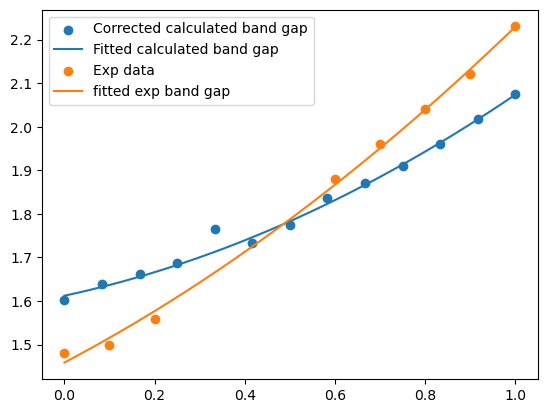

In [42]:
plt.scatter(df.x, df['HSE06corrected'], label = 'Corrected calculated band gap')
plt.plot(np.linspace(0,1,100), fit1(np.linspace(0,1,100)), label = "Fitted calculated band gap")
plt.scatter(exp.x, exp.bandgap, label = "Exp data")
plt.plot(np.linspace(0,1,100), fit2(np.linspace(0,1,100)), label = "fitted exp band gap")
plt.legend()